<a href="https://colab.research.google.com/github/Prasad-Khedkar/Topic_Modelling_on_News_Articles/blob/main/Topic_Modelling_on_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                                                              ## To frame the data
import os                                                                        ## For listing files in given directory
import matplotlib.pyplot as plt                                                  ## For visualization
import seaborn as sns                                                            ## For visualization

from bs4 import BeautifulSoup                                                    ## Python library used to scrape data from webpages
import re                                                                        ## Module which provides regular expression matching operations
import string                                                                    ## For string manipulation
import nltk                                                                      ## Popular library to pre-process the text in NLP
from nltk.stem import WordNetLemmatizer                                          ## A Lemmatizer  
from nltk.corpus import stopwords                                                ## Stopwords package from nltk
from wordcloud import WordCloud                                                  ## Create interactive wordclouds


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/Projects/Topic_Modelling_on_News_Articles/Data/bbc/'

In [4]:
news = []   ## Empty list for storing actual news in text       
topics = [] ## Empty list for new theme

In [5]:
Themes = ['business','entertainment','politics','sport','tech']  ## News themes 

In [6]:
for x in Themes:                               ## For every item in Themes
    all_txt_files=os.listdir(path+x)           ## List all files present in given directory
    for files in all_txt_files:                ## For every item in txt_files
        txt_path=path + x + '/' + files        ## specifying exact path of every text news file
        with open(txt_path,'rb') as f:         ## open a text file
            text=f.read()                      ## read text file
        news.append(text)                      ## append text file which is our news, to empty news list
        topics.append(x)                       ## append the topic of news file to empty topics list

In [7]:
df_raw = pd.DataFrame()                        ## creating empty dataframe

In [8]:
df_raw['News'] = news                          ## adding News column 
df_raw['News_Theme'] = topics                  ## adding News_theme column

In [9]:
df_raw.head()

,News,News_Theme
0,b'Dollar gains on Greenspan speech\n\nThe doll...,business
1,"b'India calls for fair trade rules\n\nIndia, w...",business
2,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business
3,b'Japan narrowly escapes recession\n\nJapan\'s...,business
4,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business


In [10]:
df_raw.tail()

,News,News_Theme
2220,b'Court mulls file-sharing future\n\nJudges at...,tech
2221,b'\'Podcasters\' look to net money\n\nNasa is ...,tech
2222,b'Hitachi unveils \'fastest robot\'\n\nJapanes...,tech
2223,b'Sony PSP tipped as a \'must-have\'\n\nSony\'...,tech
2224,b'Spam e-mails tempt net shoppers\n\nComputer ...,tech


In [11]:
df_raw.shape                                                                     ## Shape of raw data with total 2225 rows and 2 columns

(2225, 2)

## Data Cleaning

In [12]:
df = df_raw.copy()                                                               ## First creating a deep copy

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News        2225 non-null   object
 1   News_Theme  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [14]:
df.isnull().sum()

News          0
News_Theme    0
dtype: int64

### *Insight* : No null values present 

In [15]:
df.drop_duplicates(keep = 'first',inplace = True)                                ## Dropping duplicate values/rows

In [16]:
df.shape                                                                         ## shape changed 

(2127, 2)

In [17]:
2225-2127                                                                        ## No. of duplicate rows present

98

### *Insight* : Total 98 duplicate rows found and removed

In [18]:
a = df['News_Theme'].value_counts()
a

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: News_Theme, dtype: int64

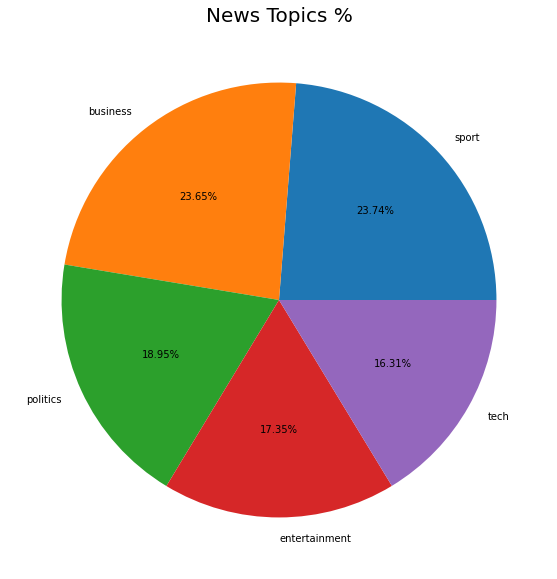

In [19]:
plt.figure(figsize = (10,10))
plt.pie(a, autopct = '%0.2f%%' , labels = a.index)
plt.title('News Topics %', size = 20)
plt.show()

## NLP Text Pre-processing

In [20]:
df['News'][0]

b'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions 

In [21]:
df['News'] = [BeautifulSoup(k).get_text() for k in df['News'] ]                   ## Getting data from any html tags if present

In [22]:
df['News'] = [re.sub(r'https?://\S+|www\.\S+', '', k1) for k1 in df['News']]      ## Removing any urls present

In [23]:
df['News'][0]

'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions u

In [24]:
df.News[2]

'Ethiopia\'s crop production up 24%\n\nEthiopia produced 14.27 million tonnes of crops in 2004, 24% higher than in 2003 and 21% more than the average of the past five years, a report says.\n\nIn 2003, crop production totalled 11.49 million tonnes, the joint report from the Food and Agriculture Organisation and the World Food Programme said. Good rains, increased use of fertilizers and improved seeds contributed to the rise in production. Nevertheless, 2.2 million Ethiopians will still need emergency assistance.\n\nThe report calculated emergency food requirements for 2005 to be 387,500 tonnes. On top of that, 89,000 tonnes of fortified blended food and vegetable oil for "targeted supplementary food distributions for a survival programme for children under five and pregnant and lactating women" will be needed.\n\nIn eastern and southern Ethiopia, a prolonged drought has killed crops and drained wells. Last year, a total of 965,000 tonnes of food assistance was needed to help seven milli

## Removing non-word characters

In [25]:
df['News'] = [re.sub(r"b\'", "", k2) for k2 in df['News']]                       ## Replacing 'b\' character with ''

In [26]:
df['News'][2]

'Ethiopia\'s crop production up 24%\n\nEthiopia produced 14.27 million tonnes of crops in 2004, 24% higher than in 2003 and 21% more than the average of the past five years, a report says.\n\nIn 2003, crop production totalled 11.49 million tonnes, the joint report from the Food and Agriculture Organisation and the World Food Programme said. Good rains, increased use of fertilizers and improved seeds contributed to the rise in production. Nevertheless, 2.2 million Ethiopians will still need emergency assistance.\n\nThe report calculated emergency food requirements for 2005 to be 387,500 tonnes. On top of that, 89,000 tonnes of fortified blended food and vegetable oil for "targeted supplementary food distributions for a survival programme for children under five and pregnant and lactating women" will be needed.\n\nIn eastern and southern Ethiopia, a prolonged drought has killed crops and drained wells. Last year, a total of 965,000 tonnes of food assistance was needed to help seven milli

In [27]:
df['News'] = [re.sub(r"\\n\\n", " ",k3) for k3 in df['News']]                    ## Replacing other non-word characters
df['News'] = [re.sub(r"\\\'s", " ",k4) for k4 in df['News']] 
df['News'] = [re.sub(r"\\\'", " ", k5) for k5 in df['News']]
df['News'] = [re.sub(r"\\n\'", " ", k6) for k6 in df['News']]
df['News'] = [re.sub(r"\n\n", " ", k7) for k7 in df['News']]
df['News'] = [re.sub(r'\\xc2\\xa3','\xA3', k8) for k8 in df['News']]             ## "\xA3" is unicode for symbol pound(£)   
df['News'] = [re.sub(r"\'s",'', k9) for k9 in df['News']] 
df['News'] = [re.sub(r'\\n"','', k10) for k10 in df['News']] 
df['News'] = [re.sub(r'b"','', k11) for k11 in df['News']] 
df['News'] = [re.sub(r'\n','', k12) for k12 in df['News']]

In [28]:
df_raw['News'][5]                                                                ## News before removing characters

b'Air passengers win new EU rights\n\nAir passengers who are unable to board their flights because of overbooking, cancellations or flight delays can now demand greater compensation.\n\nNew EU rules set compensation at between 250 euros (\xc2\xa3173) and 600 euros, depending on the length of the flight. The new rules will apply to all scheduled and charter flights, including budget airlines. Airlines have attacked the legislation saying they could be forced to push prices higher to cover the extra cost. The European Commission is facing two legal challenges - one from the European Low-fare Airlines Association (ELAA) and the other from the International Air Transport Association (IATA), which has attacked the package as a "bad piece of legislation". Previously, passengers could claim between 150 euros and 300 euros if they had been stopped from boarding.\n\nHowever, only scheduled flight operators were obliged to offer compensation in cases of overbooking and they did not have to offer

In [29]:
df['News'][5]                                                                    ## After removing non-word characters

'Air passengers win new EU rights Air passengers who are unable to board their flights because of overbooking, cancellations or flight delays can now demand greater compensation. New EU rules set compensation at between 250 euros (£173) and 600 euros, depending on the length of the flight. The new rules will apply to all scheduled and charter flights, including budget airlines. Airlines have attacked the legislation saying they could be forced to push prices higher to cover the extra cost. The European Commission is facing two legal challenges - one from the European Low-fare Airlines Association (ELAA) and the other from the International Air Transport Association (IATA), which has attacked the package as a "bad piece of legislation". Previously, passengers could claim between 150 euros and 300 euros if they had been stopped from boarding. However, only scheduled flight operators were obliged to offer compensation in cases of overbooking and they did not have to offer compensation for

## Removing Punctuations

In [31]:
string.punctuation                                                               ## Total Punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
kj = str.maketrans('', '', '!"#$%&\'()*+,-./:;?@[\\]^_{|}~`£')                   ## Replacing '' with '' and removing punctuation set

In [33]:
df['News'] = [k_j.translate(kj) for k_j in df['News']]

In [34]:
df['News'][5]

'Air passengers win new EU rights Air passengers who are unable to board their flights because of overbooking cancellations or flight delays can now demand greater compensation New EU rules set compensation at between 250 euros 173 and 600 euros depending on the length of the flight The new rules will apply to all scheduled and charter flights including budget airlines Airlines have attacked the legislation saying they could be forced to push prices higher to cover the extra cost The European Commission is facing two legal challenges  one from the European Lowfare Airlines Association ELAA and the other from the International Air Transport Association IATA which has attacked the package as a bad piece of legislation Previously passengers could claim between 150 euros and 300 euros if they had been stopped from boarding However only scheduled flight operators were obliged to offer compensation in cases of overbooking and they did not have to offer compensation for flight cancellations T

## Lowering the case

In [35]:
df['News'] = [lc.lower() for lc in df['News']]                                   ## Lower the case to give equal importance to words

In [36]:
df['News'][5]

'air passengers win new eu rights air passengers who are unable to board their flights because of overbooking cancellations or flight delays can now demand greater compensation new eu rules set compensation at between 250 euros 173 and 600 euros depending on the length of the flight the new rules will apply to all scheduled and charter flights including budget airlines airlines have attacked the legislation saying they could be forced to push prices higher to cover the extra cost the european commission is facing two legal challenges  one from the european lowfare airlines association elaa and the other from the international air transport association iata which has attacked the package as a bad piece of legislation previously passengers could claim between 150 euros and 300 euros if they had been stopped from boarding however only scheduled flight operators were obliged to offer compensation in cases of overbooking and they did not have to offer compensation for flight cancellations t

## Removing Extra space

In [37]:
df['News'] = [re.sub(r'  ','', e_sp) for e_sp in df['News']]                      ## Removing extra space to save memory

In [38]:
df['News'][6]

'call centre users lose patience customers trying to get through to call centres are getting impatient and quicker to hang up a survey suggests once past the welcome message callers on average hang up after just 65 seconds of listening to canned music the drop in patience comes as the number of calls to call centres is growing at a rate of 20 every year customers are getting used to the idea of an always available society says cara diemont of it firm dimension data which commissioned the survey however call centres also saw a sharp increase of customers simply abandoning calls she says from just over 5 in 2003 to a record 133 during last year when automated phone message systems are taken out of the equation where customers have to pick their way through multiple options and messages the number of abandoned calls is even highera sixth of all callers give up rather than wait one possible reason for the lack in patience ms diemont says is the fact that more customers are calling on the m

## Removing Numbers

In [39]:
df['News'] = [re.sub(r'\d+','', d1) for d1 in df['News']] 

In [40]:
df['News'][1]

'india calls for fair trade rules india which attends the g meeting of seven leading industrialised nations on friday is unlikely to be cowed by its newcomer status in london on thursday ahead of the meeting india finance minister lashed out at the restrictive trade policies of the g nations he objected to subsidies on agriculture that make it hard for developing nations like india to compete he also called for reform of the united nations the world bank and the imf palaniappan chidambaram india finance minister argued that these organisations need to take into account the changing world order given india and china integration into the global economy he said the issue is not globalisation but the terms of engagement in globalisation mr chidambaram is attending the g meeting as part of the g group of nations which account for two thirds of the world population at a conference on developing enterprise hosted by uk finance minister gordon brown on friday he said that he was in favour of f

## Lemmatization

#### Lemmatization is a development of Stemming and describes the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to Stemming but it brings context to the words. So it links words with similar meanings to one word. Lemmatization algorithms usually also use positional arguments as inputs, such as whether the word is an adjective, noun, or verb.



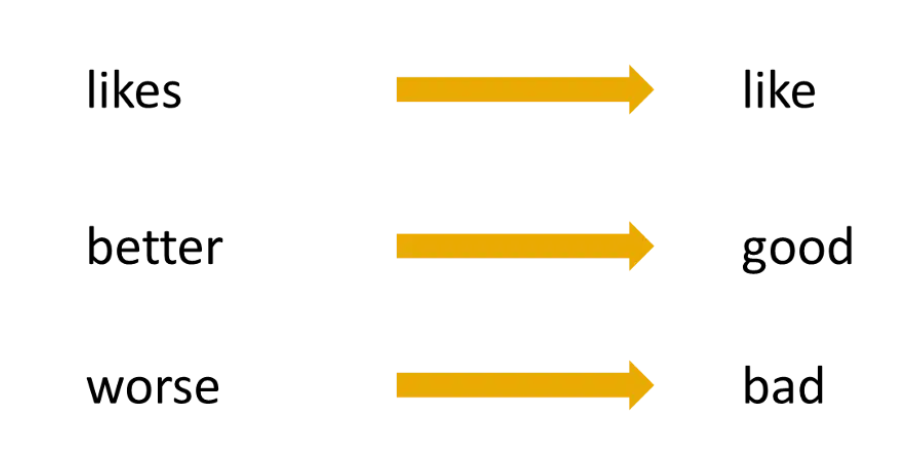
  
  

In [41]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
lmt = WordNetLemmatizer()                                                        ## Creating WordNetLemmatizer() object

In [43]:
def lemmatize_word(nbp): 
	lemma = [lmt.lemmatize(wds, pos ='v') for wds in nbp.split()] 
	return " ".join(lemma)

In [44]:
df['News'] = df['News'].apply(lemmatize_word)

In [45]:
df['News'][1]

'india call for fair trade rule india which attend the g meet of seven lead industrialise nations on friday be unlikely to be cow by its newcomer status in london on thursday ahead of the meet india finance minister lash out at the restrictive trade policies of the g nations he object to subsidies on agriculture that make it hard for develop nations like india to compete he also call for reform of the unite nations the world bank and the imf palaniappan chidambaram india finance minister argue that these organisations need to take into account the change world order give india and china integration into the global economy he say the issue be not globalisation but the term of engagement in globalisation mr chidambaram be attend the g meet as part of the g group of nations which account for two thirds of the world population at a conference on develop enterprise host by uk finance minister gordon brown on friday he say that he be in favour of float exchange rat because they help countrie

## Removing Stop words

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
all_sw = stopwords.words('english')

In [48]:
def rem_stop_words(klp):
    klp = [wd.lower() for wd in klp.split() if wd.lower() not in all_sw]
    return " ".join(klp)

In [49]:
df['News'] = df['News'].apply(rem_stop_words)

In [50]:
df['News'][1]

'india call fair trade rule india attend g meet seven lead industrialise nations friday unlikely cow newcomer status london thursday ahead meet india finance minister lash restrictive trade policies g nations object subsidies agriculture make hard develop nations like india compete also call reform unite nations world bank imf palaniappan chidambaram india finance minister argue organisations need take account change world order give india china integration global economy say issue globalisation term engagement globalisation mr chidambaram attend g meet part g group nations account two thirds world population conference develop enterprise host uk finance minister gordon brown friday say favour float exchange rat help countries cope economic shock flexible exchange rate one channel absorb positive negative shock tell conference india along china brazil south africa russia invite take part g meet take place london friday saturday china expect face renew pressure abandon fix exchange rate

## Frequent Words

In [51]:
all_words = ''.join(df['News']).split()         ## Storing all words in list
all_words

['dollar',
 'gain',
 'greenspan',
 'speech',
 'dollar',
 'hit',
 'highest',
 'level',
 'euro',
 'almost',
 'three',
 'months',
 'federal',
 'reserve',
 'head',
 'say',
 'us',
 'trade',
 'deficit',
 'set',
 'stabilise',
 'alan',
 'greenspan',
 'highlight',
 'us',
 'government',
 'willingness',
 'curb',
 'spend',
 'rise',
 'household',
 'save',
 'factor',
 'may',
 'help',
 'reduce',
 'late',
 'trade',
 'new',
 'york',
 'dollar',
 'reach',
 'euro',
 'thursday',
 'market',
 'concern',
 'deficit',
 'hit',
 'greenback',
 'recent',
 'months',
 'friday',
 'federal',
 'reserve',
 'chairman',
 'mr',
 'greenspan',
 'speech',
 'london',
 'ahead',
 'meet',
 'g',
 'finance',
 'minister',
 'send',
 'dollar',
 'higher',
 'earlier',
 'tumble',
 'back',
 'worsethanexpected',
 'us',
 'job',
 'data',
 'think',
 'chairman',
 'take',
 'much',
 'sanguine',
 'view',
 'current',
 'account',
 'deficit',
 'take',
 'time',
 'say',
 'robert',
 'sinche',
 'head',
 'currency',
 'strategy',
 'bank',
 'america',
 'new

In [52]:
len(all_words)

457326

In [53]:
all_words = pd.Series(all_words)

In [54]:
all_words.value_counts()[:20]

say       8327
mr        2857
would     2451
make      2106
also      2035
people    1871
new       1854
us        1770
year      1721
one       1660
take      1658
go        1634
game      1558
get       1491
could     1433
time      1404
use       1394
win       1391
last      1341
first     1221
dtype: int64

In [55]:
useless_words = ['say', 'mr','would','make','also','year','take','could','use','time','go']

In [56]:
df['News'][0]

'dollar gain greenspan speech dollar hit highest level euro almost three months federal reserve head say us trade deficit set stabilise alan greenspan highlight us government willingness curb spend rise household save factor may help reduce late trade new york dollar reach euro thursday market concern deficit hit greenback recent months friday federal reserve chairman mr greenspan speech london ahead meet g finance minister send dollar higher earlier tumble back worsethanexpected us job data think chairman take much sanguine view current account deficit take time say robert sinche head currency strategy bank america new york take longerterm view lay set condition current account deficit improve year next worry deficit concern china however remain china currency remain peg dollar us currency sharp fall recent months therefore make chinese export price highly competitive call shift beijing policy fall deaf ears despite recent comment major chinese newspaper time ripe loosen peg g meet th

In [57]:
len(df['News'][0].split())              ## Words in first news before removing useless words 

226

In [58]:
def remove_words(klp):                  ## Defining function to remove useless words
    """ Function to remove useless_words. """
    return ' '.join(x for x in klp.split() if x not in useless_words)

In [59]:
df['News'] = df['News'].apply(remove_words)

In [60]:
df['News'][0]

'dollar gain greenspan speech dollar hit highest level euro almost three months federal reserve head us trade deficit set stabilise alan greenspan highlight us government willingness curb spend rise household save factor may help reduce late trade new york dollar reach euro thursday market concern deficit hit greenback recent months friday federal reserve chairman greenspan speech london ahead meet g finance minister send dollar higher earlier tumble back worsethanexpected us job data think chairman much sanguine view current account deficit robert sinche head currency strategy bank america new york longerterm view lay set condition current account deficit improve next worry deficit concern china however remain china currency remain peg dollar us currency sharp fall recent months therefore chinese export price highly competitive call shift beijing policy fall deaf ears despite recent comment major chinese newspaper ripe loosen peg g meet think unlikely produce meaningful movement chine

In [61]:
len(df['News'][0].split())                                                       ## Total words in first news after removing useless words

214

In [62]:
new_words = ''.join(df['News']).split()

In [63]:
new_words = pd.Series(new_words)

In [64]:
new_list = new_words.value_counts()
new_list

people         1871
new            1854
us             1769
one            1660
game           1558
               ... 
buccaneerit       1
februaryhow       1
catweazle         1
gandalf           1
marketsony        1
Length: 29846, dtype: int64

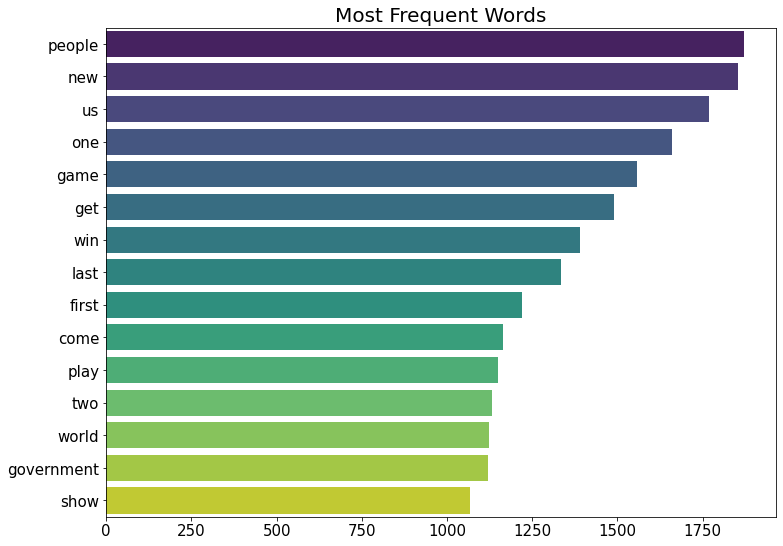

In [65]:
plt.figure(figsize = (12,9))
sns.barplot(x = new_list[:15], y = new_list.index[:15] , palette = 'viridis')
plt.title('Most Frequent Words' , size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.show()

In [66]:
dall_news = ''.join(df['News'])                ## Converting to string for wordcloud operation

In [67]:
type(dall_news)

str

## WordCloud

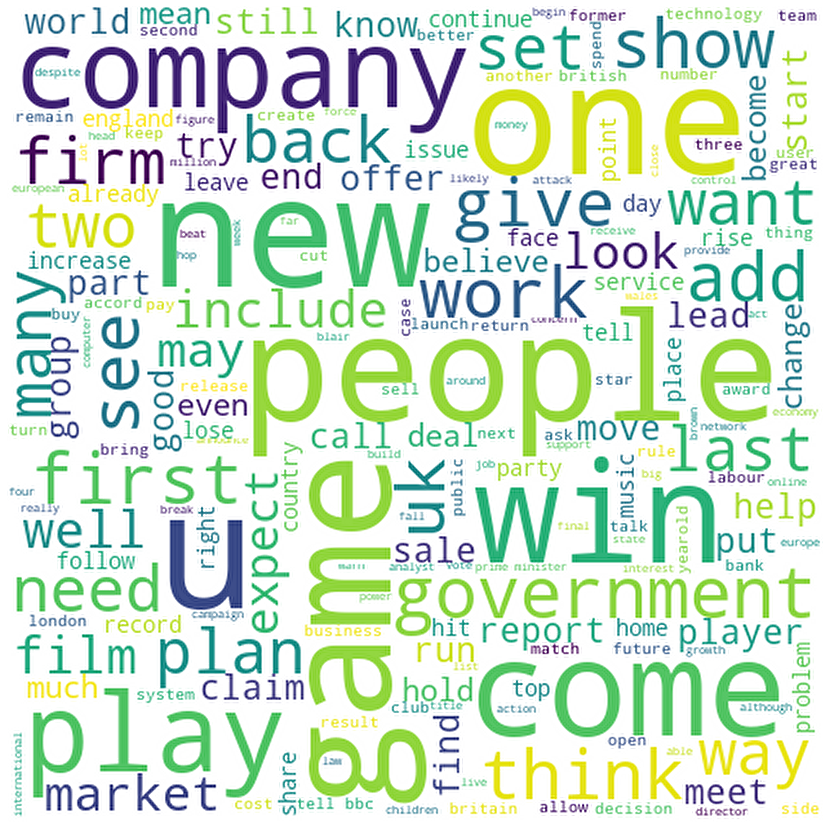

In [68]:
plt.figure(figsize = (15,15))
word_cloud = WordCloud(width= 500 , height= 500 ,background_color ='white',  max_font_size=100).generate(dall_news)
plt.imshow(word_cloud, interpolation="sinc")
plt.axis('off')
plt.show()